In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.listdir("/Users/leo/Library/Mobile Documents/com~apple~CloudDocs/Research/ICML Robgen/Experiment_result")

['resnet_CIFAR10_0.01_sgd_0.0005.xlsx',
 'resnet_CIFAR10_0.015_sgd_0.001.xlsx',
 'result_PCA.xlsx',
 'resnet_CIFAR10_0.005_sgd_0.0005.xlsx',
 'resnet_CIFAR10_0.015_sgd_0.0015.xlsx',
 'resnet_CIFAR10_0.01_adam_0.001.xlsx',
 'shufflenet1_CIFAR10_0.01_sgd_0.001.xlsx',
 '.DS_Store',
 'all_results.xlsx',
 'resnet_CIFAR10_0.015_sgd_0.0005.xlsx',
 'resnet_CIFAR10_0.01_sgd_0.0015.xlsx',
 'resnet_CIFAR10_0.005_sgd_0.0015.xlsx',
 'resnet_CIFAR10_0.005_sgd_0.001.xlsx',
 'shufflenet3_CIFAR10_0.01_sgd_0.001.xlsx',
 'result_PCA_minus.xlsx',
 'resnet_CIFAR10_0.01_adamw_0.001.xlsx',
 'resnet_CIFAR10_0.01_sgd_0.001.xlsx',
 'shufflenet2_CIFAR10_0.01_sgd_0.001.xlsx',
 'resnet34_CIFAR10_0.01_sgd_0.001.xlsx',
 'resnet50_CIFAR10_0.01_sgd_0.001.xlsx']

In [4]:
data = pd.read_excel("/Users/leo/Library/Mobile Documents/com~apple~CloudDocs/Research/ICML Robgen/Experiment_result/all_results.xlsx")

In [5]:
data["theorem 3"] = data["loss_l1"] + data["theorem 3 mean"]
data["theorem 4"] = data["loss_l1"] + data["theorem 4 mean"]
data["theorem 5"] = data["theorem 5 mean"]

In [6]:
data = data[data['num_cluster'] == 10000].reset_index(drop=True)

In [7]:
hyper_params_data = data[(data["optimizer"] == "sgd") & (data["model"] == "resnet")]

In [8]:
hyper_params_data = hyper_params_data.reset_index(drop=True)

In [9]:
hyper_params_data['label'] = hyper_params_data.apply(lambda x: "_".join(["lr="+str(x["lr"]), "wd="+str(x["weight_decay"])]), axis=1)

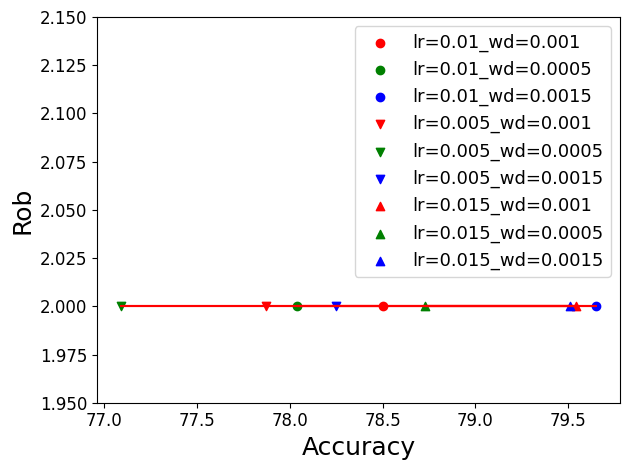

In [10]:
markers = ["o" , "v" , "^"]
colors = ['r','g','b']

fig = plt.figure()

ax = fig.add_subplot()
m, b = np.polyfit(hyper_params_data["acc"].values, hyper_params_data["theorem 3"].values, 1)

for i in range(hyper_params_data.shape[0]):
    ax.scatter(hyper_params_data["acc"].values[i], hyper_params_data["theorem 3"].values[i], color=colors[i%len(colors)], marker=markers[i//len(markers)], label=hyper_params_data["label"].values[i])
ax.set_ylim([1.95, 2.15])
ax.plot(hyper_params_data["acc"].values, m * hyper_params_data["acc"].values + b, color="red")
ax.legend(fontsize=13)

plt.xlabel("Accuracy", fontsize=18)
plt.ylabel("Rob", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()
plt.savefig("Theorem 3.png", dpi=500)

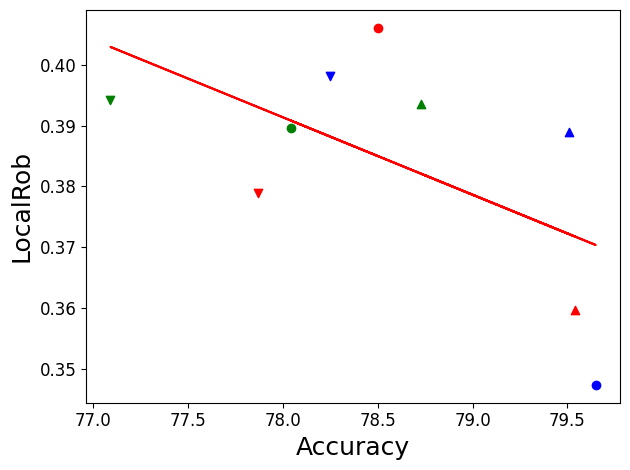

In [11]:
markers = ["o" , "v" , "^"]
colors = ['r','g','b']

fig = plt.figure()

ax = fig.add_subplot()
m, b = np.polyfit(hyper_params_data["acc"].values, hyper_params_data["theorem 4"].values, 1)

for i in range(hyper_params_data.shape[0]):
    ax.scatter(hyper_params_data["acc"].values[i], hyper_params_data["theorem 4"].values[i], color=colors[i%len(colors)], marker=markers[i//len(markers)], label=hyper_params_data["label"].values[i])

ax.plot(hyper_params_data["acc"].values, m * hyper_params_data["acc"].values + b, color="red")
#ax.legend()
plt.xlabel("Accuracy", fontsize=18)
plt.ylabel("LocalRob", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()
plt.savefig("Theorem 4.png", dpi=500)

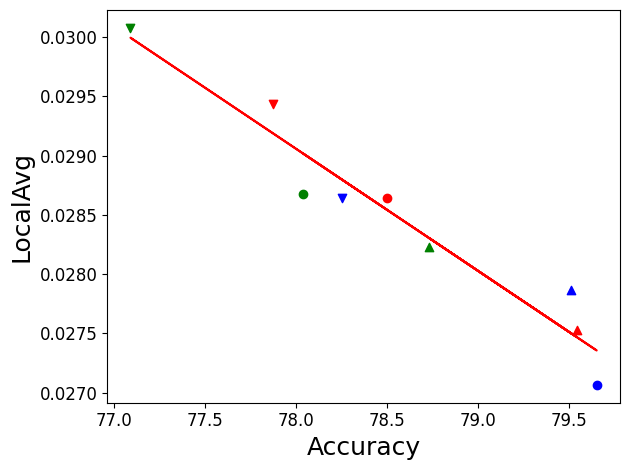

In [12]:
markers = ["o" , "v" , "^"]
colors = ['r','g','b']

fig = plt.figure()

ax = fig.add_subplot()
m, b = np.polyfit(hyper_params_data["acc"].values, hyper_params_data["theorem 5"].values, 1)

for i in range(hyper_params_data.shape[0]):
    ax.scatter(hyper_params_data["acc"].values[i], hyper_params_data["theorem 5"].values[i], color=colors[i%len(colors)], marker=markers[i//len(markers)], label=hyper_params_data["label"].values[i])

ax.plot(hyper_params_data["acc"].values, m * hyper_params_data["acc"].values + b, color="red")
#ax.legend()
plt.xlabel("Accuracy", fontsize=18)
plt.ylabel("LocalAvg", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()
plt.savefig("Theorem 5.png", dpi=500)